In [1]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.circuit.library import MCMT
from qiskit.circuit.library.standard_gates import SGate, TGate

## CSWAP Gate Decomposition Simplification

### CSWAP Gate 

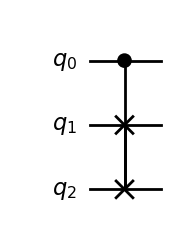

In [2]:
cswapgate = QuantumCircuit(3)

cswapgate.cswap(0,1,2)

cswapgate.draw(style="bw")


### Decomposed Circuit

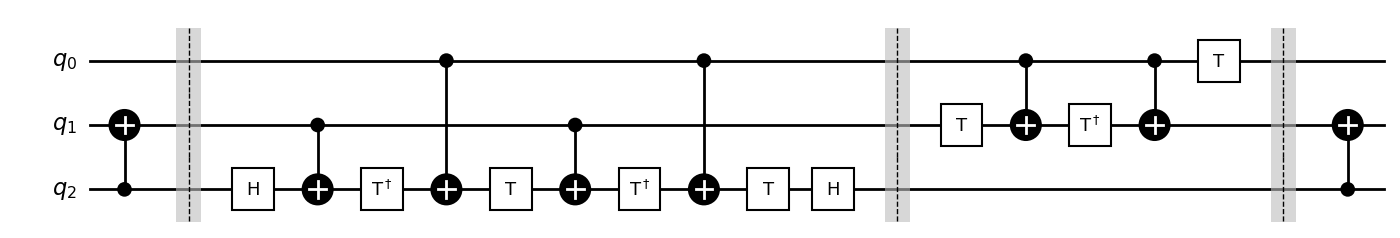

In [3]:
qc = QuantumCircuit(3)

qc.cx(2,1)
qc.barrier()

qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.h(2)

qc.barrier()

qc.t(1)
qc.cx(0,1)
qc.tdg(1)
qc.cx(0,1)
qc.t(0)

qc.barrier()
qc.cx(2,1)


qc.draw('mpl',style='bw')


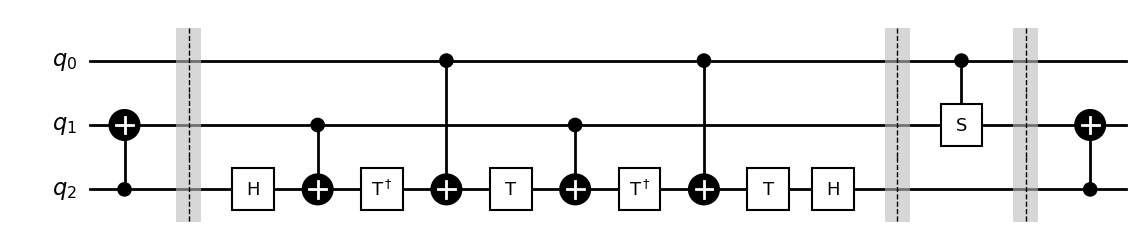

In [4]:
qcs = QuantumCircuit(3)

qcs.cx(2,1)
qcs.barrier()

qcs.h(2)
qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)
qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)
qcs.h(2)
qcs.barrier()


csgate = SGate().control(1)

qcs.append(csgate, [0, 1])

qcs.barrier()

qcs.cx(2,1)


qcs.draw('mpl', style='bw')

In [5]:
from qiskit.quantum_info import Operator
Op1 = Operator(cswapgate)
Op2 = Operator(qc)
Op3 = Operator(qcs)


print("Analysis Before simplification")
print(qc.count_ops())
print("Circuit Depth = ", qc.depth())


print("Analysis after simplification")
print(qcs.count_ops())
print("Circuit Depth = ", qcs.depth())


print("Test for Validity:")
print("Decomposed Circuit: ", Op1.equiv(Op2))
print("Simplified Circuit:", Op1.equiv(Op3))

Analysis Before simplification
OrderedDict([('cx', 8), ('t', 4), ('barrier', 3), ('tdg', 3), ('h', 2)])
Circuit Depth =  17
Analysis after simplification
OrderedDict([('cx', 6), ('barrier', 3), ('h', 2), ('tdg', 2), ('t', 2), ('cs', 1)])
Circuit Depth =  13
Test for Validity:
Decomposed Circuit:  True
Simplified Circuit: True


## CCZ Gate Decomposition Simplification

### CCZ Gate 

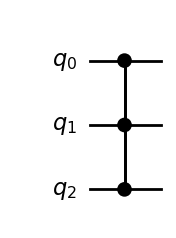

In [6]:
cczgate = QuantumCircuit(3)

cczgate.ccz(0,1,2)

cczgate.draw(style="bw")


### Decomposed Circuit

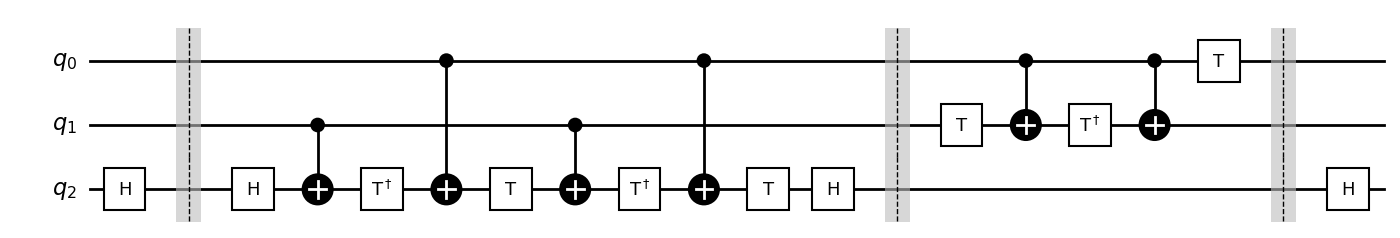

In [7]:
qc = QuantumCircuit(3)

qc.h(2)
qc.barrier()

qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.h(2)

qc.barrier()

qc.t(1)
qc.cx(0,1)
qc.tdg(1)
qc.cx(0,1)
qc.t(0)

qc.barrier()
qc.h(2)


qc.draw('mpl',style='bw')


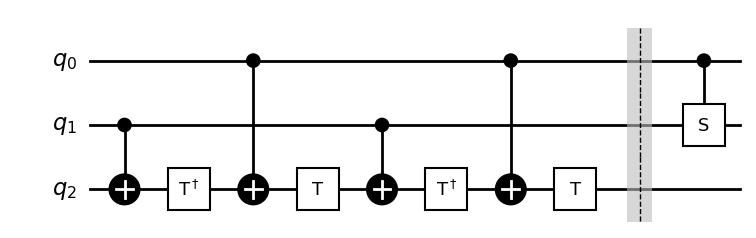

In [8]:
qcs = QuantumCircuit(3)



qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)
qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)

qcs.barrier()


csgate = SGate().control(1)

qcs.append(csgate, [0, 1])



qcs.draw('mpl', style='bw')

In [9]:
from qiskit.quantum_info import Operator
Op1 = Operator(cczgate)
Op2 = Operator(qc)
Op3 = Operator(qcs)


print("Analysis Before simplification")
print(qc.count_ops())
print("Circuit Depth = ", qc.depth())


print("Analysis after simplification")
print(qcs.count_ops())
print("Circuit Depth = ", qcs.depth())


print("Test for Validity:")
print("Decomposed Circuit: ", Op1.equiv(Op2))
print("Simplified Circuit: ", Op1.equiv(Op3))

Analysis Before simplification
OrderedDict([('cx', 6), ('h', 4), ('t', 4), ('barrier', 3), ('tdg', 3)])
Circuit Depth =  17
Analysis after simplification
OrderedDict([('cx', 4), ('tdg', 2), ('t', 2), ('barrier', 1), ('cs', 1)])
Circuit Depth =  9
Test for Validity:
Decomposed Circuit:  True
Simplified Circuit:  True


## Full Adder Decomposition Simplification

### Full Adder 

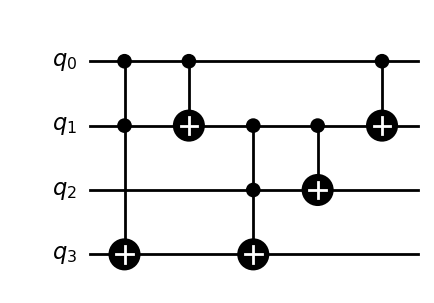

In [10]:
fadd = QuantumCircuit(4)

fadd.ccx(0,1,3)
fadd.cx(0,1)
fadd.ccx(1,2,3)
fadd.cx(1,2)
fadd.cx(0,1)

fadd.draw(style="bw")


### Decomposed Circuit

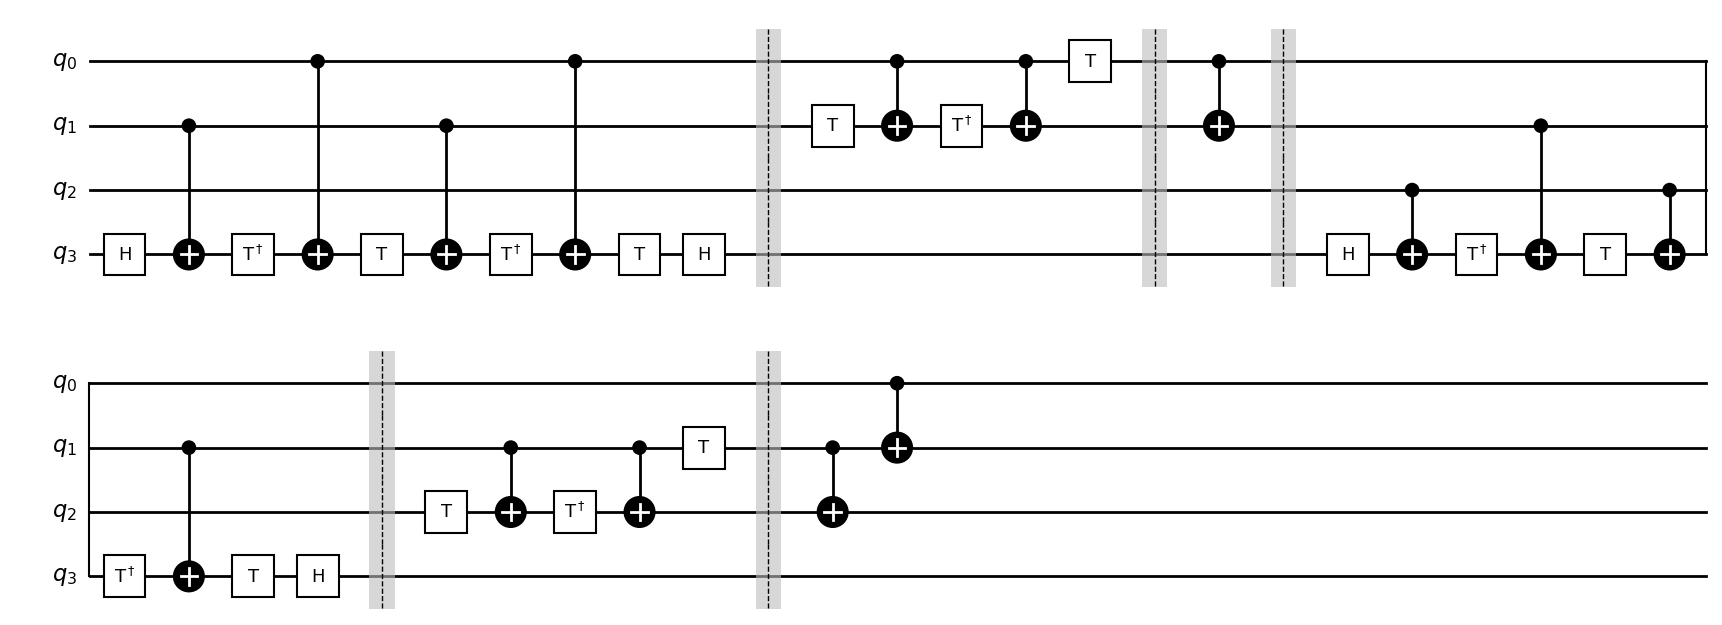

In [11]:
qc = QuantumCircuit(4)


qc.h(3)
qc.cx(1,3)
qc.tdg(3)
qc.cx(0,3)
qc.t(3)
qc.cx(1,3)
qc.tdg(3)
qc.cx(0,3)
qc.t(3)
qc.h(3)

qc.barrier()

qc.t(1)
qc.cx(0,1)
qc.tdg(1)
qc.cx(0,1)
qc.t(0)

qc.barrier()

qc.cx(0,1)

qc.barrier()

qc.h(3)
qc.cx(2,3)
qc.tdg(3)
qc.cx(1,3)
qc.t(3)
qc.cx(2,3)
qc.tdg(3)
qc.cx(1,3)
qc.t(3)
qc.h(3)

qc.barrier()

qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(1,2)
qc.t(1)

qc.barrier()
qc.cx(1,2)
qc.cx(0,1)
qc.draw('mpl',style='bw')


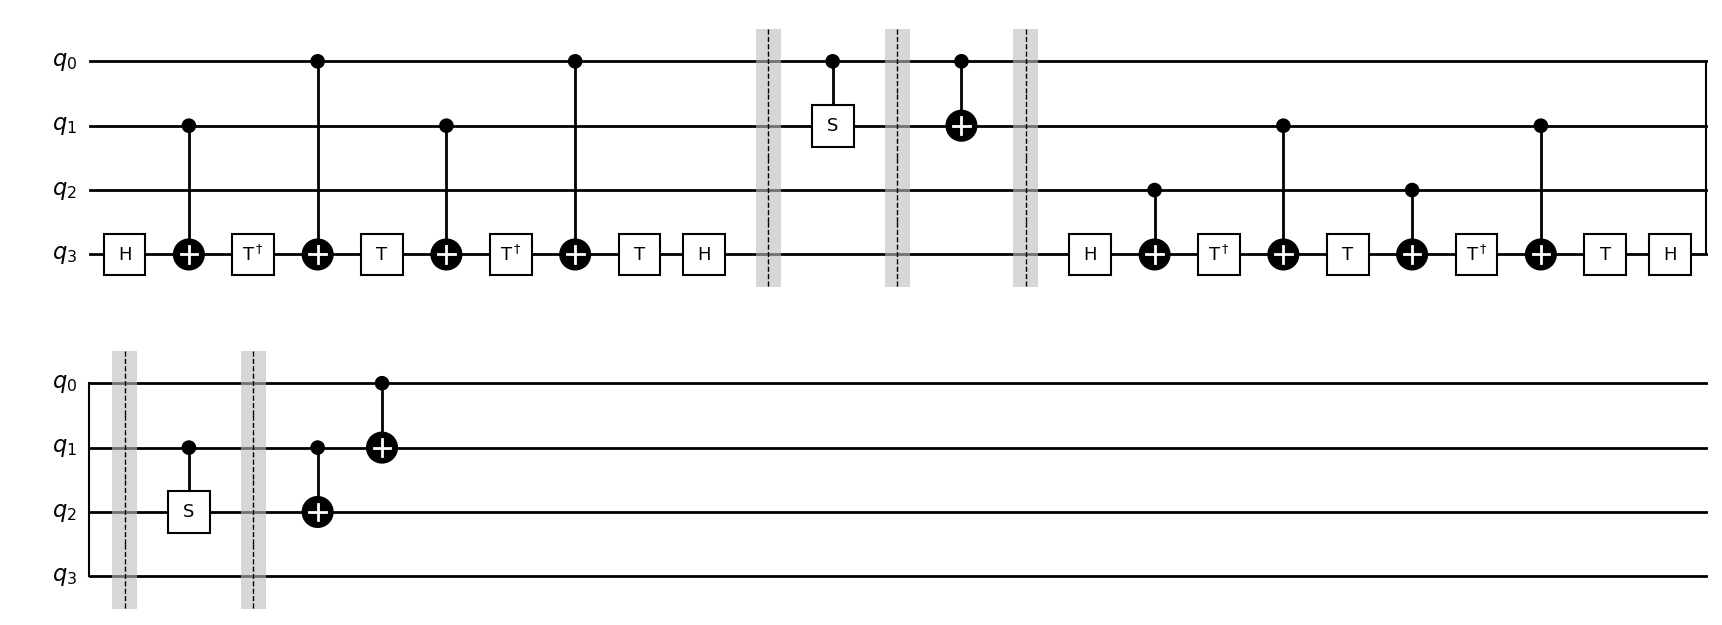

In [12]:
from qiskit import QuantumCircuit

qcs = QuantumCircuit(4)

qcs.h(3)
qcs.cx(1, 3)
qcs.tdg(3)
qcs.cx(0, 3)
qcs.t(3)
qcs.cx(1, 3)
qcs.tdg(3)
qcs.cx(0, 3)
qcs.t(3)
qcs.h(3)

qcs.barrier()
csgate = SGate().control(1)

qcs.append(csgate, [0, 1])


qcs.barrier()

qcs.cx(0, 1)

qcs.barrier()

qcs.h(3)
qcs.cx(2,3)
qcs.tdg(3)
qcs.cx(1,3)
qcs.t(3)
qcs.cx(2,3)
qcs.tdg(3)
qcs.cx(1,3)
qcs.t(3)
qcs.h(3)

qcs.barrier()
qcs.append(csgate, [1, 2])

qcs.barrier()
qcs.cx(1, 2)
qcs.cx(0, 1)

qcs.draw('mpl', style='bw')


In [13]:
from qiskit.quantum_info import Operator
Op1 = Operator(fadd)
Op2 = Operator(qc)
Op3 = Operator(qcs)


print("Analysis Before simplification")
print(qc.count_ops())
print("Circuit Depth = ", qc.depth())


print("Analysis after simplification")
print(qcs.count_ops())
print("Circuit Depth = ", qcs.depth())


print("Test for Validity:")
print("Decomposed Circuit: ", Op1.equiv(Op2))
print("Simplified Circuit: ", Op1.equiv(Op3))

Analysis Before simplification
OrderedDict([('cx', 15), ('t', 8), ('tdg', 6), ('barrier', 5), ('h', 4)])
Circuit Depth =  33
Analysis after simplification
OrderedDict([('cx', 11), ('barrier', 5), ('h', 4), ('tdg', 4), ('t', 4), ('cs', 2)])
Circuit Depth =  25
Test for Validity:
Decomposed Circuit:  True
Simplified Circuit:  True


## Grover's Search Simplification

### Oracle 

|011> state search 

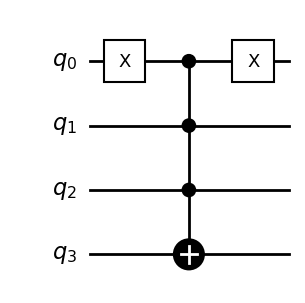

In [14]:
oc = QuantumCircuit(4)
oc.x(0)
oc.mct([0,1,2],3)
oc.x(0)
oc.draw('mpl',style='bw')

### Decomposed Circuit

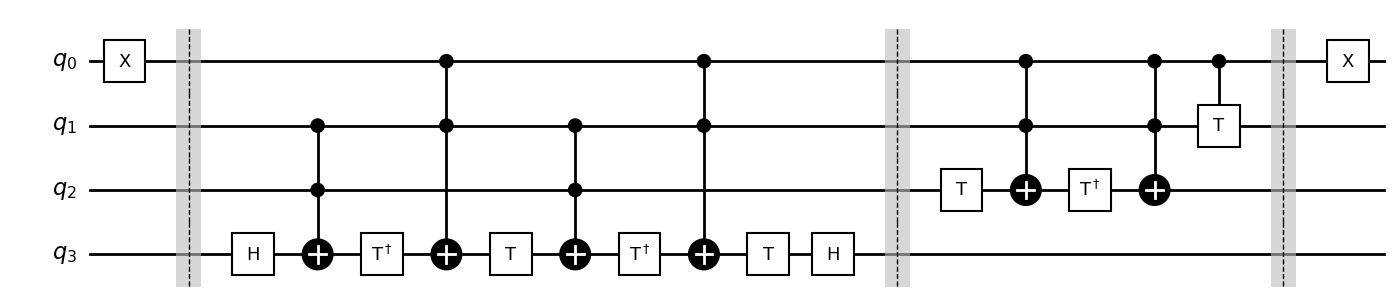

In [15]:
od = QuantumCircuit(4)
od.x(0)
od.barrier()
od.h(3)
od.ccx(1,2,3)
od.tdg(3)
od.ccx(0,1,3)
od.t(3)
od.ccx(1,2,3)
od.tdg(3)
od.ccx(0,1,3)
od.t(3)
od.h(3)
od.barrier()

od.t(2)
od.ccx(0,1,2)
od.tdg(2)
od.ccx(0,1,2)


csgate = TGate().control(1)
od.append(csgate, [0, 1])
od.barrier()
od.x(0)

od.draw(style='bw')

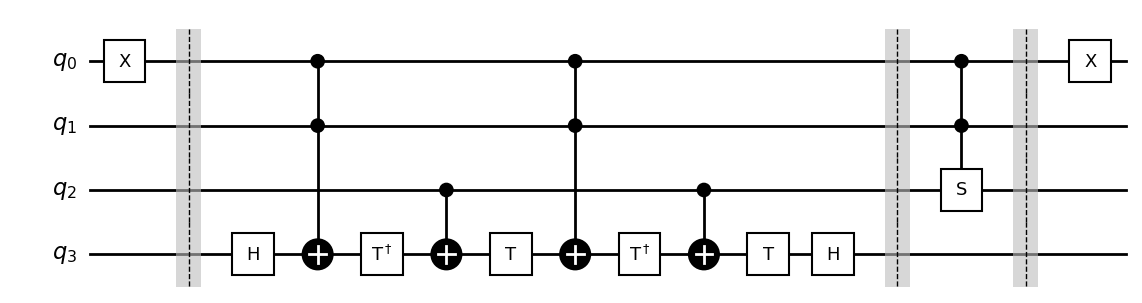

In [16]:
os = QuantumCircuit(4)
os.x(0)
os.barrier()
os.h(3)
os.ccx(0, 1, 3)
os.tdg(3)
os.cx(2,3)
os.t(3)
os.ccx(0, 1, 3)
os.tdg(3)
os.cx(2,3)
os.t(3)
os.h(3)
os.barrier()


csgate = SGate().control(2)
os.append(csgate, [0, 1, 2])
os.barrier()
os.x(0)

os.draw(style='bw')


In [17]:
from qiskit.quantum_info import Operator
Op1 = Operator(oc)
Op2 = Operator(od)
Op3 = Operator(os)


print("Analysis Before simplification")
print(od.count_ops())
print("Circuit Depth = ", od.depth())


print("Analysis after simplification")
print(os.count_ops())
print("Circuit Depth = ", os.depth())


print("Test for Validity:")
print("Decomposed Circuit: ", Op1.equiv(Op2))
print("Simplified Circuit: ", Op1.equiv(Op3))

Analysis Before simplification
OrderedDict([('ccx', 6), ('barrier', 3), ('tdg', 3), ('t', 3), ('x', 2), ('h', 2), ('ct', 1)])
Circuit Depth =  17
Analysis after simplification
OrderedDict([('barrier', 3), ('x', 2), ('h', 2), ('ccx', 2), ('tdg', 2), ('cx', 2), ('t', 2), ('ccs', 1)])
Circuit Depth =  13
Test for Validity:
Decomposed Circuit:  True
Simplified Circuit:  True


### Amplification Circuit

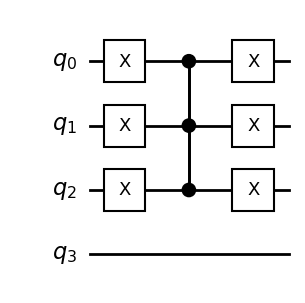

In [18]:
amp = QuantumCircuit(4)
amp.x([0,1,2])
amp.ccz(0,1,2)
amp.x([0,1,2])
amp.draw(style='bw')


#### Decomposition

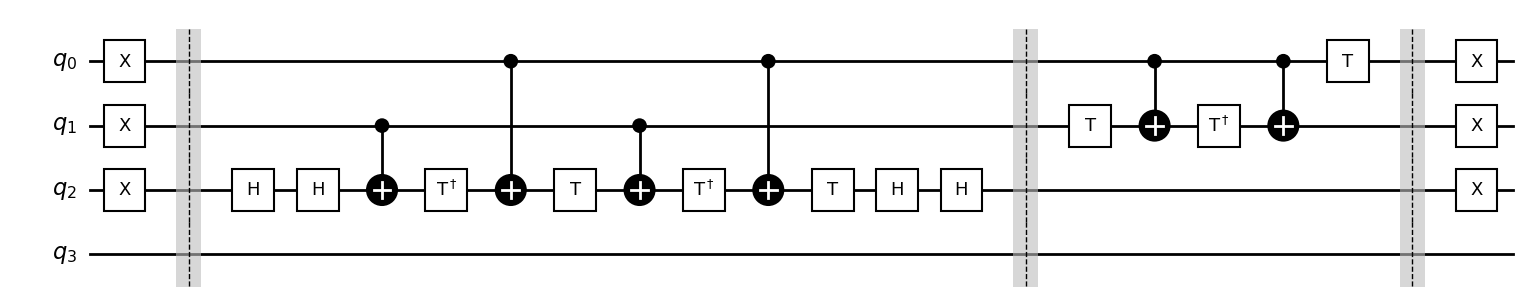

In [19]:
damp = QuantumCircuit(4)
damp.x([0,1,2])
damp.barrier()
damp.h(2)
damp.h(2)
damp.cx(1,2)
damp.tdg(2)
damp.cx(0,2)
damp.t(2)
damp.cx(1,2)
damp.tdg(2)
damp.cx(0,2)
damp.t(2)
damp.h(2)
damp.h(2)
damp.barrier()

damp.t(1)
damp.cx(0,1)
damp.tdg(1)
damp.cx(0,1)
damp.t(0)
damp.barrier()

damp.x([0,1,2])


damp.draw(style='bw')

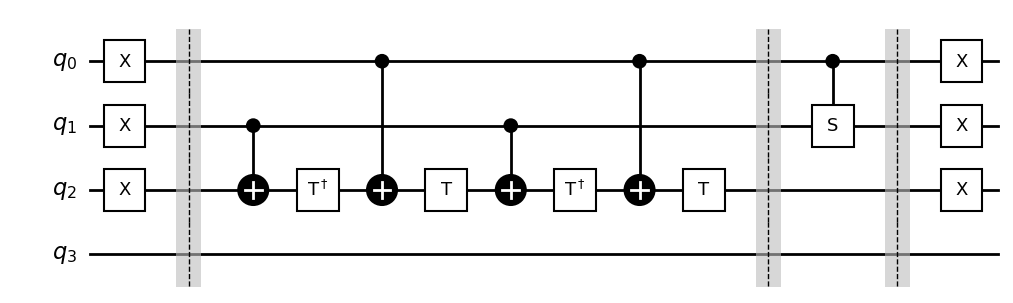

In [20]:
samp = QuantumCircuit(4)
samp.x([0, 1, 2])

samp.barrier()

samp.cx(1, 2)
samp.tdg(2)
samp.cx(0, 2)
samp.t(2)
samp.cx(1, 2)
samp.tdg(2)
samp.cx(0, 2)
samp.t(2)

samp.barrier()

csgate = SGate().control(1)
samp.append(csgate, [0, 1])

samp.barrier()

samp.x([0, 1, 2])

samp.draw(style='bw')


In [21]:
from qiskit.quantum_info import Operator
Op1 = Operator(amp)
Op2 = Operator(damp)
Op3 = Operator(samp)


print("Analysis Before simplification")
print(damp.count_ops())
print("Circuit Depth = ", damp.depth())


print("Analysis after simplification")
print(samp.count_ops())
print("Circuit Depth = ", samp.depth())


print("Test for Validity:")
print("Decomposed Circuit: ", Op1.equiv(Op2))
print("Simplified Circuit: ", Op1.equiv(Op3))

Analysis Before simplification
OrderedDict([('x', 6), ('cx', 6), ('h', 4), ('t', 4), ('barrier', 3), ('tdg', 3)])
Circuit Depth =  19
Analysis after simplification
OrderedDict([('x', 6), ('cx', 4), ('barrier', 3), ('tdg', 2), ('t', 2), ('cs', 1)])
Circuit Depth =  11
Test for Validity:
Decomposed Circuit:  True
Simplified Circuit:  True


### Full Circuit

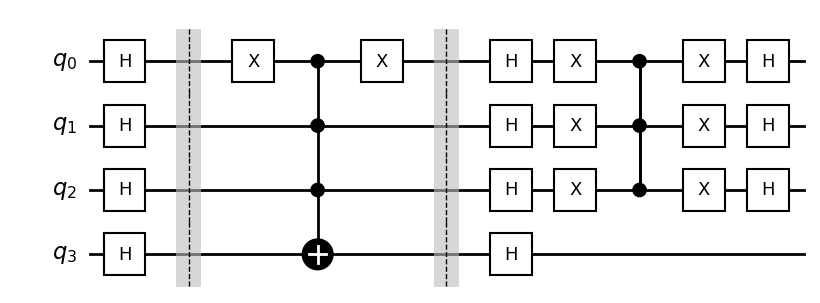

In [22]:
g = QuantumCircuit(4)
g.h([0,1,2,3])
g.barrier()
g = g.compose(oc)
g.barrier()
g.h([0,1,2,3])
g = g.compose(amp)
g.h([0,1,2])
g.draw(style='bw')

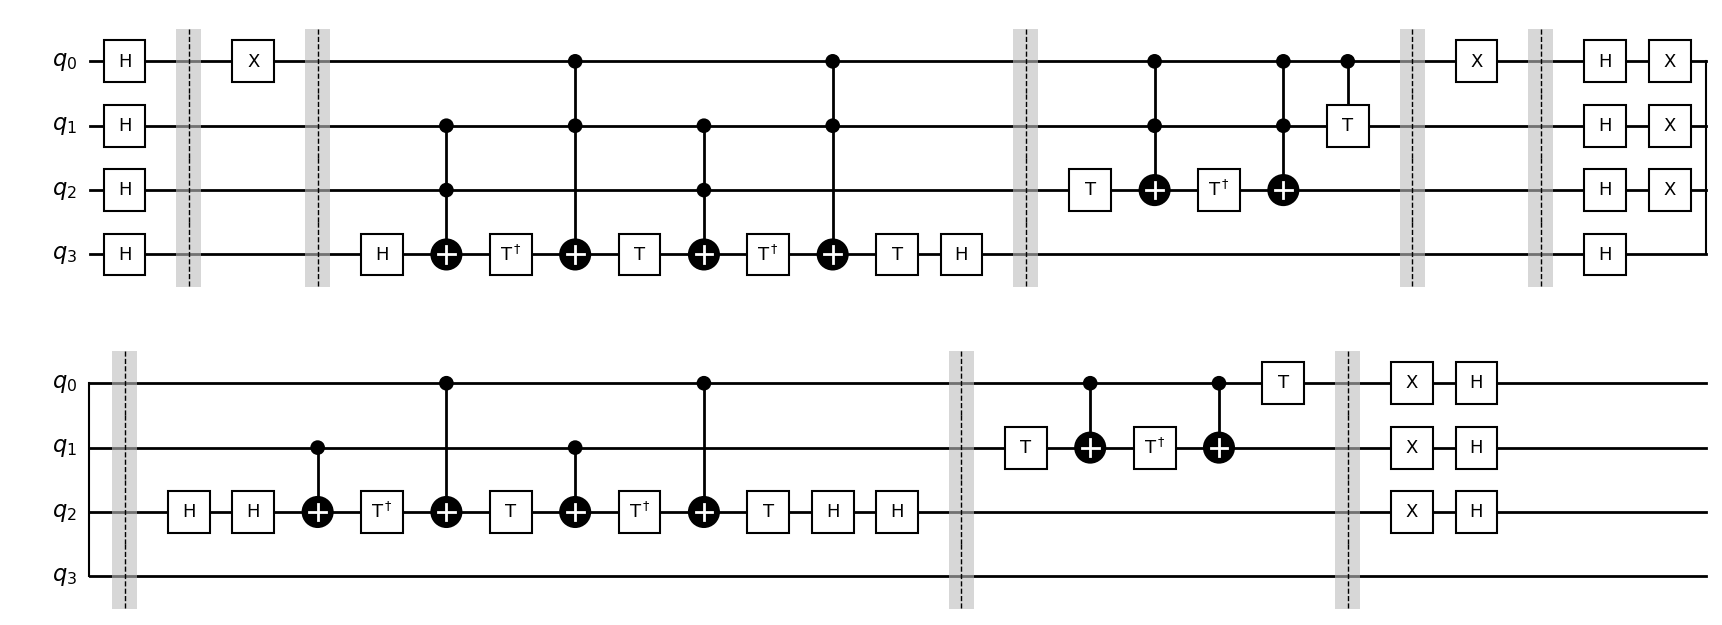

In [23]:
dg = QuantumCircuit(4)
dg.h([0,1,2,3])
dg.barrier()
dg = dg.compose(od)
dg.barrier()
dg.h([0,1,2,3])
dg = dg.compose(damp)
dg.h([0,1,2])
dg.draw(style='bw')

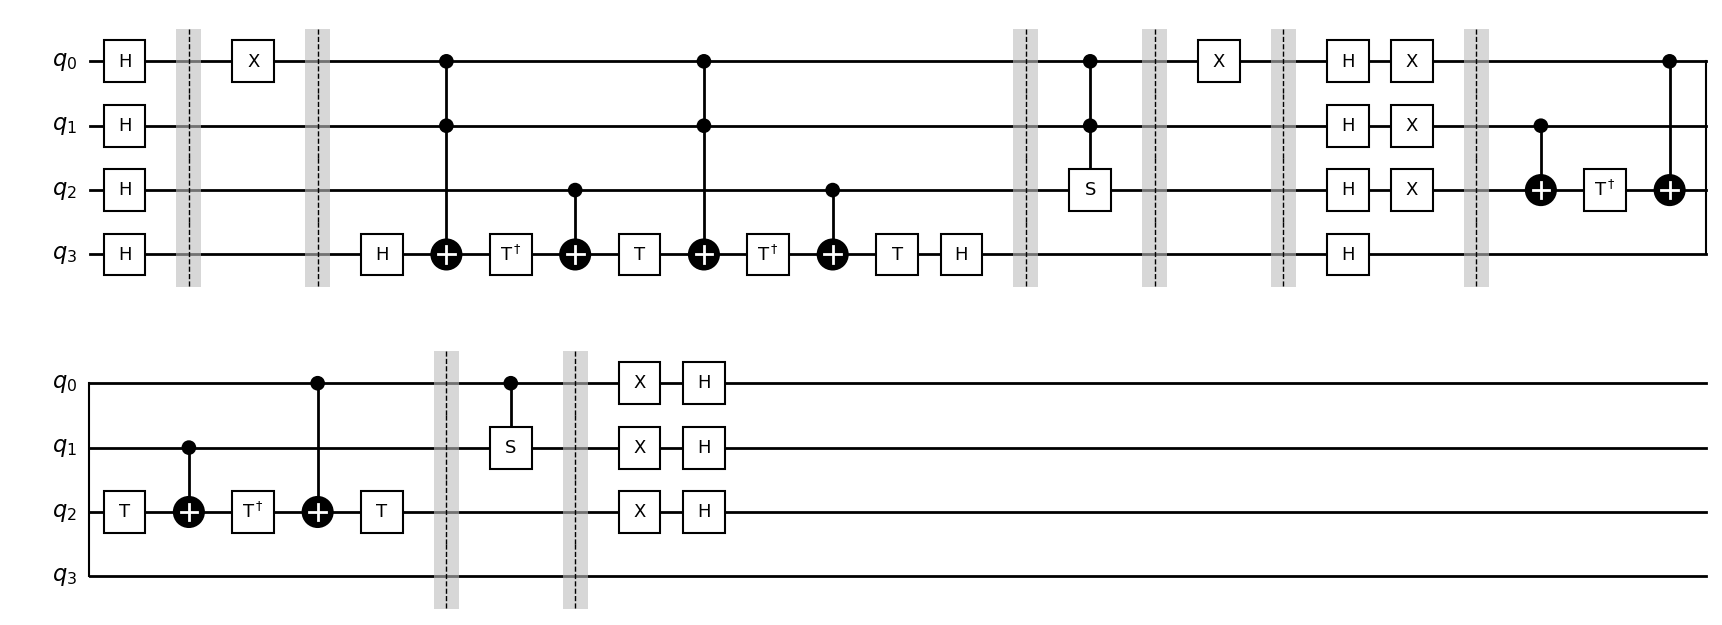

In [24]:
sg = QuantumCircuit(4)
sg.h([0,1,2,3])
sg.barrier()
sg = sg.compose(os)
sg.barrier()
sg.h([0,1,2,3])
sg = sg.compose(samp)
sg.h([0,1,2])
sg.draw(style='bw')

In [25]:
from qiskit.quantum_info import Operator
Op1 = Operator(g)
Op2 = Operator(dg)
Op3 = Operator(sg)


print("Analysis Before simplification")
print(dg.count_ops())
print("Circuit Depth = ", dg.depth())


print("Analysis after simplification")
print(sg.count_ops())
print("Circuit Depth = ", sg.depth())


print("Test for Validity:")
print("Decomposed Circuit: ", Op1.equiv(Op2))
print("Simplified Circuit: ", Op1.equiv(Op3))

Analysis Before simplification
OrderedDict([('h', 17), ('barrier', 8), ('x', 8), ('t', 7), ('ccx', 6), ('tdg', 6), ('cx', 6), ('ct', 1)])
Circuit Depth =  39
Analysis after simplification
OrderedDict([('h', 13), ('barrier', 8), ('x', 8), ('cx', 6), ('tdg', 4), ('t', 4), ('ccx', 2), ('ccs', 1), ('cs', 1)])
Circuit Depth =  27
Test for Validity:
Decomposed Circuit:  True
Simplified Circuit:  True


## Quantum Counter 

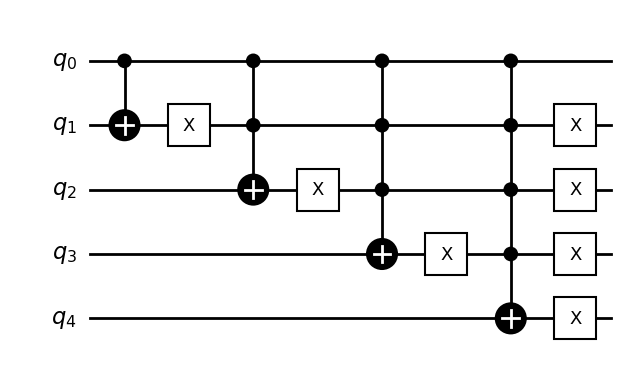

In [26]:
c = QuantumCircuit(5)
c.cx(0,1)
c.x(1)
c.ccx(0,1,2)
c.x(2)
c.mct([0,1,2],3)
c.x(3)
c.mct([0,1,2,3],4)
c.x([1,2,3,4])
c.draw(style='bw')


In [31]:
dc = QuantumCircuit(5)
dc.cx(0,1)
dc.x(1)

# 3 qubit toffoli gate
dc.barrier()
dc.h(2)
dc.cx(1,2)
dc.tdg(2)
dc.cx(0,2)
dc.t(2)
dc.cx(1,2)
dc.tdg(2)
dc.cx(0,2)
dc.t(2)
dc.h(2)
dc.barrier()
dc.t(1)
dc.cx(0,1)
dc.tdg(1)
dc.cx(0,1)
dc.t(0)
dc.barrier()
dc.x(2)
dc.barrier()

#4 qubit toffoli gate 
dc.h(3)
dc.ccx(1, 2, 3)
dc.tdg(3)
dc.ccx(0, 1, 3)
dc.t(3)
dc.ccx(1, 2, 3)
dc.tdg(3)
dc.ccx(0, 1, 3)
dc.t(3)
dc.h(3)
dc.barrier()

dc.t(2)
dc.ccx(0, 1, 2)
dc.tdg(2)
dc.ccx(0, 1, 2)
ctgate1 = TGate().control(1)
dc.append(ctgate1, [0, 1])

dc.barrier()
dc.x(3)

#5 qubit toffoli gate
dc.barrier()
dc.h(4)
#dc.ccx(0,1,4) 
dc.mct([0,1,2],4)
dc.tdg(4)
#dc.ccx(2,3,4)
dc.mct([1,2,3],4)
dc.t(4)
#dc.ccx(0,1,4)
dc.mct([0,1,2],4)
dc.tdg(4)
#dc.ccx(2,3,4)
dc.mct([1,2,3],4)
dc.t(4)
dc.h(4)
dc.barrier()
dc.t(3)
dc.mct([0,1,2],3) 
dc.tdg(3)
dc.mct([0,1,2],3)
ctgate = TGate().control(2)
dc.append(ctgate, [0, 1, 2])

dc.barrier()
dc.x([1,2,3,4])
dc.draw(style='bw')

In [33]:
sc = QuantumCircuit(5)
sc.cx(0, 1)
sc.x(1)

# 3 qubit toffoli gate
sc.barrier()
sc.h(2)
sc.cx(1, 2)
sc.tdg(2)
sc.cx(0, 2)
sc.t(2)
sc.cx(1, 2)
sc.tdg(2)
sc.cx(0, 2)
sc.t(2)
sc.h(2)
sc.barrier()
sc.cs(0,1)
sc.barrier()

# 4 qubit toffoli gate 

sc.x(2)
sc.barrier()
sc.h(3)
sc.ccx(0, 1, 3)
sc.tdg(3)
sc.cx(2,3)
sc.t(3)
sc.ccx(0, 1, 3)
sc.tdg(3)
sc.cx(2,3)
sc.t(3)
sc.h(3)
sc.barrier()

csgate2 = SGate().control(2)
sc.append(csgate2, [0, 1, 2])

sc.barrier()
sc.x(3)

# 5 qubit toffoli gate
sc.barrier()
sc.h(4)
sc.ccx(0,1,4) 
sc.tdg(4)
sc.ccx(2,3,4)
sc.t(4)
sc.ccx(0,1,4)
sc.tdg(4)
sc.ccx(2,3,4)
sc.t(4)
sc.h(4)
sc.barrier()
ctgate3 = SGate().control(3)
sc.append(ctgate3, [0, 1, 2, 3])

sc.barrier()
sc.x([1, 2, 3, 4])

sc.draw(style='bw')


In [29]:
from qiskit.quantum_info import Operator
Op1 = Operator(c)
Op2 = Operator(dc)
Op3 = Operator(sc)


print("Analysis Before simplification")
print(dc.count_ops())
print("Circuit Depth = ", dc.depth())


print("Analysis after simplification")
print(sc.count_ops())
print("Circuit Depth = ", sc.depth())


print("Test for Validity:")
print("Decomposed Circuit: ", Op1.equiv(Op2))
print("Simplified Circuit: ", Op1.equiv(Op3))

Analysis Before simplification
OrderedDict([('t', 10), ('barrier', 9), ('tdg', 9), ('cx', 7), ('x', 7), ('h', 6), ('ccx', 6), ('mcx', 6), ('ct', 1), ('cct', 1)])
Circuit Depth =  50
Analysis after simplification
OrderedDict([('barrier', 9), ('cx', 7), ('x', 7), ('h', 6), ('tdg', 6), ('t', 6), ('ccx', 6), ('cs', 1), ('ccs', 1), ('c3s', 1)])
Circuit Depth =  38
Test for Validity:
Decomposed Circuit:  True
Simplified Circuit:  True
